# Project Title: Customer Analysis Based On Olist E-Commerce Data

# Team Members

Xingjian Liu: liuxjum  
Hongxuan An: aanaa

# Overview

Olist is a Brazilian e-commerce platform that connects small and medium-sized businesses to customers across Brazil. The platform operates as a marketplace, where merchants can list their products and services and customers can browse and purchase them online. Olist has rich e-commerce operational data, providing details at each stage of e-commerce sales. 

The primary objective of our project is to conduct a comprehensive customer analysis for Olist. By diving deep into the behavioral patterns, transactional data, and overall engagement of customers, we aim to derive actionable insights that can drive personalized marketing strategies, enhance customer retention, and optimize resource allocation. The ultimate goal is to provide business intelligence that will empower the platform to not only meet but exceed customer expectations, thereby fostering a loyal customer base and driving sustainable growth.

# Motivation

The motivation behind choosing this particular topic stems from the recognition of customers as the lifeblood of any e-commerce platform. In today's highly competitive digital marketplace, understanding customer behavior and value is vital and paramount. We were particularly drawn to the challenge of unlocking the potential within customer data, mainly in three aspects:  
* Customer EDA: By exploring and understanding the underlying patterns in customer distributions and behaviors, we can provide a general overview of the Olist e-commerce data and uncover areas of improvement within the platform.
* Customer Segmentation: By segmenting customers into meaningful groups based on their transactional behavior, we can enable targeted marketing efforts and more efficient allocation of resources, improving personalized customer experience.
* Customer Lifetime Value (LTV) Prediction: Predicting LTV is crucial for decision-making about customer acquisition and retention strategies by focusing on customers who are most likely to contribute significantly to the platform’s profitability over time.  

To sum up, this project is driven by the desire to derive data-driven solutions that enable the e-commerce platform to not only survive but thrive in the competitive landscape. Through this analysis, we hope to contribute to the development of a more customer-centered platform that values and leverages the power of its customer data to drive decisions and strategies.


![Olist Problem Schema](images/olist_problem_schema.png)

# Data Sources

Kaggle: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce  
The data was provided by Olist, containing multiple datasets that can be joined on certain keys. The schema is shown below:  
![Olist Dataset Schema](images/olist_dataset_schema.png)


# I. Data Description

## I.1. Import Packages

In [2]:
! pip3 install plotly
! pip3 install folium
! pip3 install wordcloud

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.gridspec import GridSpec
pd.set_option('display.max_columns', 100)

import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go

import json
import requests
import folium
from folium.plugins import FastMarkerCluster, Fullscreen, MiniMap, HeatMap, HeatMapWithTime, LocateControl
from wordcloud import WordCloud
from collections import Counter
from PIL import Image

In [4]:
orders = pd.read_csv('Dataset/olist_orders_dataset.csv')
payment = pd.read_csv('Dataset/olist_order_payments_dataset.csv')
customers = pd.read_csv('Dataset/olist_customers_dataset.csv')
geolocation = pd.read_csv('Dataset/olist_geolocation_dataset.csv')
products = pd.read_csv('Dataset/olist_products_dataset.csv')
sellers = pd.read_csv('Dataset/olist_sellers_dataset.csv')
items = pd.read_csv('Dataset/olist_order_items_dataset.csv')
category = pd.read_csv('Dataset/product_category_name_translation.csv')
reviews = pd.read_csv('Dataset/olist_order_reviews_dataset.csv')


In [5]:
datasets = [orders, payment, customers, geolocation, products, sellers, items, category, reviews]
names = ['orders', 'payment', 'customers', 'geolocation', 'products', 'sellers', 'items', 'category', 'reviews']

## I.2. List Variables

In [6]:
data_info = pd.DataFrame(columns=['dataset', 'column', 'dtype'])
for name in names:
    dataset = datasets[names.index(name)]
    for col in dataset.columns:
        data_info.loc[len(data_info)] = [name, col, dataset[col].dtype]
data_info

dataset                         column    dtype
0        orders                       order_id   object
1        orders                    customer_id   object
2        orders                   order_status   object
3        orders       order_purchase_timestamp   object
4        orders              order_approved_at   object
5        orders   order_delivered_carrier_date   object
6        orders  order_delivered_customer_date   object
7        orders  order_estimated_delivery_date   object
8       payment                       order_id   object
9       payment             payment_sequential    int64
10      payment                   payment_type   object
11      payment           payment_installments    int64
12      payment                  payment_value  float64
13    customers                    customer_id   object
14    customers             customer_unique_id   object
15    customers       customer_zip_code_prefix    int64
16    customers                  customer_city   object
17    customers                 customer_state   object
18  geolocation    geolocation_zip_code_prefix    int64
19  geolocation                geolocation_lat  float64
20  geolocation                geolocation_lng  float64
21  geolocation               geolocation_city   object
22  geolocation              geolocation_state   object
23     products                     product_id   object
24     products          product_category_name   object
25     products            product_name_lenght  float64
26     products     product_description_lenght  float64
27     products             product_photos_qty  float64
28     products               product_weight_g  float64
29     products              product_length_cm  float64
30     products              product_height_cm  float64
31     products               product_width_cm  float64
32      sellers                      seller_id   object
33      sellers         seller_zip_code_prefix    int64
34      sellers                    seller_city   object
35      sellers                   seller_state   object
36        items                       order_id   object
37        items                  order_item_id    int64
38        items                     product_id   object
39        items                      seller_id   object
40        items            shipping_limit_date   object
41        items                          price  float64
42        items                  freight_value  float64
43     category          product_category_name   object
44     category  product_category_name_english   object
45      reviews                      review_id   object
46      reviews                       order_id   object
47      reviews                   review_score    int64
48      reviews           review_comment_title   object
49      reviews         review_comment_message   object
50      reviews           review_creation_date   object
51      reviews        review_answer_timestamp   object

**Table Description**:  
1. olist_order_customer_dataset  
   Olist Customers  
     > customerd_id => key to the orders dataset. Each order has a unique customerd_id  
     > customers_unique_id => unique identifier of a customer  
     > customers_zip_code_prefix => first five digits of customer zip code  
     > customer_city => customer city name  
     > customer_state => customer state  
2. olist_order_dataset  
   Olist Orders  
     > order_id => unique identifier of the order  
     > customer_id => key to the customer dataset. Each order has a unique customer_id  
     > order_status => reference to the order status (delivered, shipped, etc)  
     > order_purchase_timestamp => shows the purchase timestamp  
     > order_approved_at => shows the payments approval timestamp  
     > order_delivered_carrier_state => shows the order posting timestamp. When it was handled to the logistic partner  
     > order_delivered_customer_date => shows the actual order delivery date to the customer  
     > order_estimated_delivery_date => shows the estimated delivery date that was informed to customer at the purchase moment  
3. olist_order_reviews_dataset  
   Olist Order Review  
     > review_id => unique review identifier  
     > order_id => unique order identifier  
     > review_score => note ranging from 1 to 5 given by the customer on a satisfaction survey  
     > review_comment_title => comment title from the review left by the customer, in Portuguese  
     > review_comment_message => comment message from the review left by the customer, in Portuguese  
     > review_creation_date => shows the date in which the satisfaction survey was sent to the customer  
     > review_answer_timestamp => shows satisfaction survey answer timestamp  
4. olist_order_payments_dataset  
   Olist Order Payments  
     > order_id => unique identifier of an order  
     > payment_sequential => a customer may pay an order with more than one payment method. if he does so, a sequence will be created to accomodate all payments  
     > payment_type => method of payment chosen by the customer  
     > payment_installments => number of installments chosen by the customer  
     > payment_value => transaction value  
5. olist_order_items_dataset  
   Olist Order Items  
     > order_id => order unique identifier  
     > order_item_id => sequential number identifying number of items included in the same order  
     > product_id => product unique identifier  
     > seller_id => seller unique identifier  
     > shipping_limit_date => shows the seller shipping limit date for handling the order over to the logistics partner  
     > price => item price  
     > freight_value => item freight value (if an order has more than one item the freight value is splitted between items)  
6. olist_products_dataset  
   Olist Products  
     > product_id => unique product  identifier  
     > product_category_name => root category of product, in Portuguese  
     > product_name_lenght => number of characters extracted from the product name  
     > product_description_lenght => number of characters extracted from the product product_description_lenght  
     > product_photos_qty => number of product published product_photos_qty  
     > product_weight_g => product weight measured in grams  
     > product_length_cm => product length measured in centimeters  
     > product_height_cm => product height measured in centimeters  
     > product_width_cm => product width measured in centimeters  
7. olist_sellers_dataset  
   Olist seller    
     > seller_id => seller unique identifier  
     > seller_zip_code_prefix => first 5 digits of seller zip codes  
     > seller_city => seller city name  
     > seller_state => seller state  
8. olist_geolocation_dataset  
   Olist Geolocation  
     > geolocation_zip_code_prefix => first 5 digits of zip code  
     > geolocation_lat => latitude  
     > geolocation_lng => longitude  
     > geolocation_city => city name  
     > geolocation_state => state  
9. product_category_name_translation  
   Product Category Name Translation  
     > product_category_name => category name in Portuguese  
     > product_category_name_english => category name in english  

## I.3. Inspect Datasets

In [7]:
data_inspection = pd.DataFrame({})
data_inspection['dataset'] = names
data_inspection['rows'] = [df.shape[0] for df in datasets]
data_inspection['cols'] = [df.shape[1] for df in datasets]
data_inspection['null_values'] = [df.isnull().sum().sum() for df in datasets]
data_inspection['n_cols_with_null'] = [len([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]
data_inspection['cols_with_null'] = [', '.join([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]

data_inspection.style.background_gradient()

### further inspect reviews dataset

In [8]:
reviews.shape[0], reviews.order_id.nunique(), reviews.review_id.nunique()

(99224, 98673, 98410)

In [9]:
# inspect orders with multiple reviews
multi_review_order = reviews.groupby('order_id').review_id.nunique().reset_index(name='n_reviews')
multi_review_order[multi_review_order.n_reviews > 1].sort_values('n_reviews', ascending=False)

order_id  n_reviews
86232  df56136b8031ecd28e200bb18e6ddb2e          3
77319  c88b1d1b157a9999ce368f218a407141          3
54489  8e17072ec97ce29f0e1f111e598b0c85          3
1455   03c939fd7fd3b38f8485a0f95798f1f6          3
63428  a5507507d82c1fb664405882ed065af0          2
...                                 ...        ...
27210  468edfd1aeeeef023e6bba4943f2cdfb          2
26671  45390ff93f092f0de1524d486a172c33          2
26601  450c49623c365a4edcf0c5a2c93aa7c9          2
26500  44cb884118c81bf6db2f43cf11ab63d6          2
98553  ffaabba06c9d293a3c614e0515ddbabc          2

[547 rows x 2 columns]

In [10]:
# inspect reviews correspondent to multiple orders (which is confusing)
multi_order_review = reviews.groupby('review_id').order_id.nunique().reset_index(name='n_orders')
multi_order_review[multi_order_review.n_orders > 1].sort_values('n_orders', ascending=False)

review_id  n_orders
26600  4548534449b1f572e357211b90724f1b         3
17423  2d6ac45f859465b5c185274a1c929637         3
12172  1fb4ddc969e6bea80e38deec00393a6f         3
29612  4d0e6dd087008d1f992d25ef6e1f619f         3
75615  c444278834184f72b1484dfe47de7f97         3
...                                 ...       ...
35190  5bdf704ce1edc91bc6c73abede903d1c         2
35352  5c4bd938f98283c5d7145a9d25a89c3e         2
35466  5c99f6ff0f883ea3b283853720266109         2
35554  5ccf9e14796ecb4f98ce11d896e9f0c0         2
98309  ffb8cff872a625632ac983eb1f88843c         2

[789 rows x 2 columns]

In [11]:
reviews[reviews.order_id == 'df56136b8031ecd28e200bb18e6ddb2e']

review_id                          order_id  \
2952   c444278834184f72b1484dfe47de7f97  df56136b8031ecd28e200bb18e6ddb2e   
13982  72a1098d5b410ae50fbc0509d26daeb9  df56136b8031ecd28e200bb18e6ddb2e   
62728  44f3e54834d23c5570c1d010824d4d59  df56136b8031ecd28e200bb18e6ddb2e   

       review_score review_comment_title review_comment_message  \
2952              5                  NaN                    NaN   
13982             5                  NaN                    NaN   
62728             5                  NaN                    NaN   

      review_creation_date review_answer_timestamp  
2952   2017-02-08 00:00:00     2017-02-14 13:58:48  
13982  2017-02-07 00:00:00     2017-02-10 10:46:09  
62728  2017-02-09 00:00:00     2017-02-09 09:07:28

In [12]:
reviews[reviews.review_id == 'ffb8cff872a625632ac983eb1f88843c']

review_id                          order_id  \
1985   ffb8cff872a625632ac983eb1f88843c  c88b1d1b157a9999ce368f218a407141   
73951  ffb8cff872a625632ac983eb1f88843c  c44883fc2529b4aa03ca90e7e09d95b6   

       review_score review_comment_title review_comment_message  \
1985              3                  NaN                    NaN   
73951             3                  NaN                    NaN   

      review_creation_date review_answer_timestamp  
1985   2017-07-22 00:00:00     2017-07-26 13:41:07  
73951  2017-07-22 00:00:00     2017-07-26 13:41:07

It appears that there are cases where one review_id corresponds to multiple order_id (i.e. customer wrote a single review for multiple orders),  and also cases where one order_id corresponds to multiple review_id (i.e. customer wrote multiple reviews for one single order).  
We need to take this into consideration in our feature engineering step.

# II. Data Manipulation

## II.1. Geolocation Processing

In this part, we constrained the geolocation to the Brazil region,   
and take the average of geolocation latitudes and longitudes to represent the geolocation for each zip code

In [13]:
# Using the API to bring the region to the data
r = requests.get('https://servicodados.ibge.gov.br/api/v1/localidades/mesorregioes')
content = [c['UF'] for c in json.loads(r.text)]
brazil = pd.DataFrame(content)
brazil.head()

id sigla      nome                                    regiao
0  11    RO  Rondônia  {'id': 1, 'sigla': 'N', 'nome': 'Norte'}
1  11    RO  Rondônia  {'id': 1, 'sigla': 'N', 'nome': 'Norte'}
2  12    AC      Acre  {'id': 1, 'sigla': 'N', 'nome': 'Norte'}
3  12    AC      Acre  {'id': 1, 'sigla': 'N', 'nome': 'Norte'}
4  13    AM  Amazonas  {'id': 1, 'sigla': 'N', 'nome': 'Norte'}

In [14]:
brazil['nome_regiao'] = brazil['regiao'].apply(lambda x: x['nome'])
brazil.drop('regiao', axis=1, inplace=True)
brazil.drop_duplicates(inplace=True)

# Filter the geolocation data to the Brazilian region by constraining the lat and lng
geo = geolocation[(geolocation.geolocation_lat <= 5.27438888) & (geolocation.geolocation_lat >= -33.75116944) & (geolocation.geolocation_lng >= -73.98283055) & (geolocation.geolocation_lng <= -34.79314722)] 

# Since one zip code can have multiple lat and lng, we choose the minimum lat and lng for each zip code
geo_group = geo.groupby(by='geolocation_zip_code_prefix', as_index=False).agg({'geolocation_lat': 'mean', 'geolocation_lng': 'mean'})
geo_group.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
0                         1001       -23.550190       -46.634024
1                         1002       -23.548146       -46.634979
2                         1003       -23.548994       -46.635731
3                         1004       -23.549799       -46.634757
4                         1005       -23.549456       -46.636733

## II.2. Timestamp Processing

only `orders` and `reviews` have timestamp data

In [15]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

# Extracting Time attributes for purchase date
orders['order_purchase_year'] = orders['order_purchase_timestamp'].apply(lambda x: x.year)
orders['order_purchase_month'] = orders['order_purchase_timestamp'].apply(lambda x: x.month)
orders['order_purchase_month_name'] = orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%b'))
orders['order_purchase_year_month'] = orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m'))
orders['order_purchase_date'] = orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m%d'))
orders['order_purchase_day'] = orders['order_purchase_timestamp'].apply(lambda x: x.day)
orders['order_purchase_dayofweek'] = orders['order_purchase_timestamp'].apply(lambda x: x.dayofweek)
orders['order_purchase_dayofweek_name'] = orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%a'))
orders['order_purchase_hour'] = orders['order_purchase_timestamp'].apply(lambda x: x.hour)
orders['order_purchase_time_day'] = pd.cut(orders['order_purchase_hour'], bins=[-0.1, 6, 12, 18, 23], labels=['Dawn', 'Morning', 'Afternoon', 'Night'])

orders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  order_purchase_year  order_purchase_month  \
0           2017-10-18 00:00:00                 2017                    10   
1           2018-08-13 00:00:00                 2018                     7   
2           2018-09-04 00:00:00                 2018                     8   
3           2017-12-15 00:00:00                 2017                    11   
4           2018-02-26 00:00:00                 2018                     2   

  order_purchase_month_name order_purchase_year_month order_purchase_date  \
0                       Oct                    201710            20171002   
1                       Jul                    201807            20180724   
2                       Aug                    201808            20180808   
3                       Nov                    201711            20171118   
4                       Feb                    201802            20180213   

   order_purchase_day  order_purchase_dayofweek order_purchase_dayofweek_name  \
0                   2                         0                           Mon   
1                  24                         1                           Tue   
2                   8                         2                           Wed   
3                  18                         5                           Sat   
4                  13                         1                           Tue   

   order_purchase_hour order_purchase_time_day  
0                   10                 Morning  
1                   20                   Night  
2                    8                 Morning  
3                   19                   Night  
4                   21                   Night

In [16]:
reviews['review_creation_date'] = pd.to_datetime(reviews['review_creation_date'])

# Extracting Time attributes for purchase date
reviews['review_creation_year'] = reviews['review_creation_date'].apply(lambda x: x.year)
reviews['review_creation_month'] = reviews['review_creation_date'].apply(lambda x: x.month)
reviews['review_creation_month_name'] = reviews['review_creation_date'].apply(lambda x: x.strftime('%b'))
reviews['review_creation_year_month'] = reviews['review_creation_date'].apply(lambda x: x.strftime('%Y%m'))
reviews['review_creation_date'] = reviews['review_creation_date'].apply(lambda x: x.strftime('%Y%m%d'))

reviews.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN             20180118   
1                                                NaN             20180310   
2                                                NaN             20180217   
3              Recebi bem antes do prazo estipulado.             20170421   
4  Parabéns lojas lannister adorei comprar pela I...             20180301   

  review_answer_timestamp  review_creation_year  review_creation_month  \
0     2018-01-18 21:46:59                  2018                      1   
1     2018-03-11 03:05:13                  2018                      3   
2     2018-02-18 14:36:24                  2018                      2   
3     2017-04-21 22:02:06                  2017                      4   
4     2018-03-02 10:26:53                  2018                      3   

  review_creation_month_name review_creation_year_month  
0                        Jan                     201801  
1                        Mar                     201803  
2                        Feb                     201802  
3                        Apr                     201704  
4                        Mar                     201803

## II.3. Variable Selection

In [17]:
orders.drop(['order_approved_at', 'order_status', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'], axis=1, inplace=True)
payment.drop(['payment_sequential', 'payment_installments'], axis=1, inplace=True)
products.drop(['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'], axis=1, inplace=True)

## II.4. Table Merging

In [18]:
# for sales analysis
order_payment = pd.merge(orders, payment, on='order_id')  ## need the purchase timestamp and payment value to investigate temporal trends in sales

# for customer analysis
customer_state = pd.merge(customers, brazil, left_on='customer_state', right_on='sigla')
customer_geo = pd.merge(customer_state, geo_group, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix')  
customer_rfm = pd.merge(customer_geo, order_payment, on='customer_id')  ## need the purchase timestamp and payment value to calculate RFM

order_geo = pd.merge(order_payment, customer_geo, on='customer_id')  ## need the purchase timestamp to investigate temporal trends in sales
order_review = pd.merge(orders, reviews, on='order_id', how='left')  ## left join to keep orders without reviews

# for product analysis
product_sales = pd.merge(products, items, on='product_id')
product_review = pd.merge(product_sales, reviews, on='order_id', how='left')  ## left join to keep orders without reviews
product_category = pd.merge(product_review, category, on='product_category_name', how='left')  ## left join to keep orders without category name

# for seller analysis
seller_state = pd.merge(sellers, brazil, left_on='seller_state', right_on='sigla')
seller_geo = pd.merge(seller_state, geo_group, left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix')
seller_sales = pd.merge(seller_geo, product_sales, on='seller_id')



In [19]:
order_payment.to_csv('Generated_Dataset/sorder_payment.csv', index=False)
customer_rfm.to_csv('Generated_Dataset/customer_rfm.csv', index=False)
order_geo.to_csv('Generated_Dataset/order_geo.csv', index=False)
order_review.to_csv('Generated_Dataset/order_review.csv', index=False)
product_review.to_csv('Generated_Dataset/product_review.csv', index=False)
product_category.to_csv('Generated_Dataset/product_category.csv', index=False)
seller_sales.to_csv('Generated_Dataset/seller_sales.csv', index=False)

## II.5. Data Inspection of Merged Datasets

In [20]:
merged_datasets = [order_payment, customer_rfm, order_geo, order_review, product_review, product_category, seller_sales]
merged_names = ['order_payment', 'customer_rfm', 'order_geo', 'order_review', 'product_review', 'product_category', 'seller_sales']

data_inspection_merged = pd.DataFrame({})
data_inspection_merged['dataset'] = merged_names
data_inspection_merged['rows'] = [df.shape[0] for df in merged_datasets]
data_inspection_merged['cols'] = [df.shape[1] for df in merged_datasets]
data_inspection_merged['null_values'] = [df.isnull().sum().sum() for df in merged_datasets]
data_inspection_merged['n_cols_with_null'] = [len([col for col, null in df.isnull().sum().items() if null > 0]) for df in merged_datasets]
data_inspection_merged['cols_with_null'] = [', '.join([col for col, null in df.isnull().sum().items() if null > 0]) for df in merged_datasets]

data_inspection_merged.style.background_gradient()

In [21]:
merged_data_info = pd.DataFrame(columns=['dataset', 'column', 'dtype', 'n_unique_values'])
for name in merged_names:
    dataset = merged_datasets[merged_names.index(name)]
    for col in dataset.columns:
        merged_data_info.loc[len(merged_data_info)] = [name, col, dataset[col].dtype, dataset[col].nunique()]
merged_data_info

dataset                    column           dtype  n_unique_values
0    order_payment                  order_id          object            99440
1    order_payment               customer_id          object            99440
2    order_payment  order_purchase_timestamp  datetime64[ns]            98874
3    order_payment       order_purchase_year           int64                3
4    order_payment      order_purchase_month           int64               12
..             ...                       ...             ...              ...
140   seller_sales                  order_id          object            98450
141   seller_sales             order_item_id           int64               21
142   seller_sales       shipping_limit_date          object            93121
143   seller_sales                     price         float64             5959
144   seller_sales             freight_value         float64             6995

[145 rows x 4 columns]

Some of the product category names and review information (including title and message) are missing, we keep them for subsequent feature engineering.

![variable selection](images/olist_variable_selection.png)

# III. Feature Engineering

In this part, we construct useful features that indicates customer properties for subsequent analysis and modeling, including:  
* Recency, Frequency, and Monetary Features;  
* Review Features;  
    * customer average review scores;  
    * customer review rate:  
        * rating rate: (# review scores made) / (# orders placed);  
        * commenting rate: (# review comments made) / (# orders placed);  
* Payment Method Features:  
    * customer most frequently used payment method;  
    * number of payment method customer used;  
* Purchased Product Features: most frequently purchased product category

<span style="color: red;">阐述为什么这些features对segmentation和LTV prediction有用</span>


## III.1. RFM Features

In [22]:
customer_rfm.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  5dca924cc99eea2dc5ba40d11ec5dd0f  2761fee7f378f0a8d7682d8a3fa07ab1   
2  661897d4968f1b59bfff74c7eb2eb4fc  d06a495406b79cb8203ea21cc0942f8c   
3  702b62324327ccba20f1be3465426437  8b3d988f330c1d1c3332ccd440c147b7   
4  bdf997bae7ca819b0415f5174d6b4302  866755e25db620f8d7e81b351a15bb2f   

   customer_zip_code_prefix customer_city customer_state  id sigla       nome  \
0                     14409        franca             SP  35    SP  São Paulo   
1                     14409        franca             SP  35    SP  São Paulo   
2                     14409        franca             SP  35    SP  São Paulo   
3                     14409        franca             SP  35    SP  São Paulo   
4                     14409        franca             SP  35    SP  São Paulo   

  nome_regiao  geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0     Sudeste                        14409       -20.498489       -47.396929   
1     Sudeste                        14409       -20.498489       -47.396929   
2     Sudeste                        14409       -20.498489       -47.396929   
3     Sudeste                        14409       -20.498489       -47.396929   
4     Sudeste                        14409       -20.498489       -47.396929   

                           order_id order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1      2017-05-16 15:05:35   
1  95261f608a64bbbe760a212b4d48a4ee      2018-06-15 20:07:13   
2  9444fa2ab50a3f5af63b48be297eda24      2017-09-09 15:40:00   
3  dceb8e88274c6f42a88a76ed979eb817      2018-03-26 12:04:55   
4  6ee1cea1b2edcc713f83ebfbccbc57f9      2018-07-29 20:39:20   

   order_purchase_year  order_purchase_month order_purchase_month_name  \
0                 2017                     5                       May   
1                 2018                     6                       Jun   
2                 2017                     9                       Sep   
3                 2018                     3                       Mar   
4                 2018                     7                       Jul   

  order_purchase_year_month order_purchase_date  order_purchase_day  \
0                    201705            20170516                  16   
1                    201806            20180615                  15   
2                    201709            20170909                   9   
3                    201803            20180326                  26   
4                    201807            20180729                  29   

   order_purchase_dayofweek order_purchase_dayofweek_name  \
0                         1                           Tue   
1                         4                           Fri   
2                         5                           Sat   
3                         0                           Mon   
4                         6                           Sun   

   order_purchase_hour order_purchase_time_day payment_type  payment_value  
0                   15               Afternoon  credit_card         146.87  
1                   20                   Night  credit_card          94.77  
2                   15               Afternoon  credit_card          62.50  
3                   12                 Morning  credit_card          32.69  
4                   20                   Night  credit_card          77.01

In [23]:
customer_rfm['order_purchase_timestamp'] = pd.to_datetime(customer_rfm['order_purchase_timestamp'])

rfm = customer_rfm.groupby('customer_unique_id').agg({'order_purchase_timestamp': 'max'}).reset_index()
rfm['Recency'] = (rfm['order_purchase_timestamp'].max() - rfm['order_purchase_timestamp']).dt.days
rfm['Frequency'] = customer_rfm.groupby('customer_unique_id').order_id.size().reset_index(name='Frequency')['Frequency']  ## Note: need to count unique order ids, since one customer can have multiple items in one order
rfm['Monetary'] = customer_rfm.groupby('customer_unique_id').agg({'payment_value': 'sum'}).reset_index()['payment_value']

In [24]:
rfm.head()

customer_unique_id order_purchase_timestamp  Recency  \
0  0000366f3b9a7992bf8c76cfdf3221e2      2018-05-10 10:56:27      160   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      2018-05-07 11:11:27      163   
2  0000f46a3911fa3c0805444483337064      2017-03-10 21:05:03      585   
3  0000f6ccb0745a6a4b88665a16c9f078      2017-10-12 20:29:41      369   
4  0004aac84e0df4da2b147fca70cf8255      2017-11-14 19:45:42      336   

   Frequency  Monetary  
0          1    141.90  
1          1     27.19  
2          1     86.22  
3          1     43.62  
4          1    196.89

In [25]:
rfm[['Recency', 'Frequency', 'Monetary']].describe()

Recency     Frequency      Monetary
count  95826.000000  95826.000000  95826.000000
mean     287.758656      1.081105    166.593165
std      153.429504      0.462975    231.497146
min        0.000000      1.000000      0.000000
25%      163.000000      1.000000     63.120000
50%      268.000000      1.000000    108.000000
75%      397.000000      1.000000    183.520000
max      772.000000     33.000000  13664.080000

## III.2. Customer Review Features

As we said before, we do not handle the 'one review_id - multiple order_id' and 'one order_id - multiple review_id' cases further, which means we allow such cases in our dataset and calculations

In [32]:
customer_review = pd.merge(order_review, customers, on='customer_id')

In [33]:
# has review score or not
customer_review['has_review_score'] = customer_review['review_score'].apply(lambda x: 1 if x > 0 else 0)

# has review comment (title and message any) or not
customer_review['has_review_comment'] = customer_review['review_comment_title'].notnull() | customer_review['review_comment_message'].notnull()

In [36]:
customer_review_agg = customer_review.groupby('customer_unique_id').agg({
    'review_score': 'mean', 'order_id': 'count','has_review_score': 'sum', 'has_review_comment': 'sum'}).reset_index().rename(columns={
    'review_score': 'avg_review_score', 'order_id': 'order_counts', 'has_review_score': 'review_score_counts', 'has_review_comment': 'review_comment_counts'})

In [37]:
customer_review_agg['rating_rate'] = customer_review_agg['review_score_counts'] / customer_review_agg['order_counts']
customer_review_agg['comment_rate'] = customer_review_agg['review_comment_counts'] / customer_review_agg['order_counts']

有空可以加average letters used in review comments of each customer

##  III.3. Customer Payment Type Features

In [45]:
order_payment.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_purchase_timestamp  order_purchase_year  order_purchase_month  \
0      2017-10-02 10:56:33                 2017                    10   
1      2017-10-02 10:56:33                 2017                    10   
2      2017-10-02 10:56:33                 2017                    10   
3      2018-07-24 20:41:37                 2018                     7   
4      2018-08-08 08:38:49                 2018                     8   

  order_purchase_month_name order_purchase_year_month order_purchase_date  \
0                       Oct                    201710            20171002   
1                       Oct                    201710            20171002   
2                       Oct                    201710            20171002   
3                       Jul                    201807            20180724   
4                       Aug                    201808            20180808   

   order_purchase_day  order_purchase_dayofweek order_purchase_dayofweek_name  \
0                   2                         0                           Mon   
1                   2                         0                           Mon   
2                   2                         0                           Mon   
3                  24                         1                           Tue   
4                   8                         2                           Wed   

   order_purchase_hour order_purchase_time_day payment_type  payment_value  
0                   10                 Morning  credit_card          18.12  
1                   10                 Morning      voucher           2.00  
2                   10                 Morning      voucher          18.59  
3                   20                   Night       boleto         141.46  
4                    8                 Morning  credit_card         179.12

One order_id may be correspondent to multiple payment types, as is shown in order_payment index0 - index2  
We use customer_rfm in this part, since it joins customers with order_payment on order_id

In [46]:
customer_rfm.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  5dca924cc99eea2dc5ba40d11ec5dd0f  2761fee7f378f0a8d7682d8a3fa07ab1   
2  661897d4968f1b59bfff74c7eb2eb4fc  d06a495406b79cb8203ea21cc0942f8c   
3  702b62324327ccba20f1be3465426437  8b3d988f330c1d1c3332ccd440c147b7   
4  bdf997bae7ca819b0415f5174d6b4302  866755e25db620f8d7e81b351a15bb2f   

   customer_zip_code_prefix customer_city customer_state  id sigla       nome  \
0                     14409        franca             SP  35    SP  São Paulo   
1                     14409        franca             SP  35    SP  São Paulo   
2                     14409        franca             SP  35    SP  São Paulo   
3                     14409        franca             SP  35    SP  São Paulo   
4                     14409        franca             SP  35    SP  São Paulo   

  nome_regiao  geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0     Sudeste                        14409       -20.498489       -47.396929   
1     Sudeste                        14409       -20.498489       -47.396929   
2     Sudeste                        14409       -20.498489       -47.396929   
3     Sudeste                        14409       -20.498489       -47.396929   
4     Sudeste                        14409       -20.498489       -47.396929   

                           order_id order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1      2017-05-16 15:05:35   
1  95261f608a64bbbe760a212b4d48a4ee      2018-06-15 20:07:13   
2  9444fa2ab50a3f5af63b48be297eda24      2017-09-09 15:40:00   
3  dceb8e88274c6f42a88a76ed979eb817      2018-03-26 12:04:55   
4  6ee1cea1b2edcc713f83ebfbccbc57f9      2018-07-29 20:39:20   

   order_purchase_year  order_purchase_month order_purchase_month_name  \
0                 2017                     5                       May   
1                 2018                     6                       Jun   
2                 2017                     9                       Sep   
3                 2018                     3                       Mar   
4                 2018                     7                       Jul   

  order_purchase_year_month order_purchase_date  order_purchase_day  \
0                    201705            20170516                  16   
1                    201806            20180615                  15   
2                    201709            20170909                   9   
3                    201803            20180326                  26   
4                    201807            20180729                  29   

   order_purchase_dayofweek order_purchase_dayofweek_name  \
0                         1                           Tue   
1                         4                           Fri   
2                         5                           Sat   
3                         0                           Mon   
4                         6                           Sun   

   order_purchase_hour order_purchase_time_day payment_type  payment_value  
0                   15               Afternoon  credit_card         146.87  
1                   20                   Night  credit_card          94.77  
2                   15               Afternoon  credit_card          62.50  
3                   12                 Morning  credit_card          32.69  
4                   20                   Night  credit_card          77.01

In [47]:
customer_paytype = customer_rfm.groupby('customer_unique_id').agg({
    'payment_type': lambda x: x.value_counts().index[0]}).reset_index().rename(columns={'payment_type': 'most_frequent_payment_types'})

customer_paytype['n_payment_types'] = customer_rfm.groupby('customer_unique_id').payment_type.nunique().reset_index()['payment_type']

## III.4. Customer Product Features

In [51]:
order_customer = pd.merge(orders, customers, on='customer_id')
customer_product = pd.merge(order_customer, product_category, on='order_id', how='left')

In [52]:
customer_product_agg = customer_product.groupby('customer_unique_id').agg({
    'product_category_name_english': lambda x: x.value_counts().index[0] if x.notnull().sum() > 0 else np.nan}).reset_index().rename(columns={
    'product_category_name_english': 'most_frequent_product_category'})

In [53]:
customer_product_agg.head()

customer_unique_id most_frequent_product_category
0  0000366f3b9a7992bf8c76cfdf3221e2                 bed_bath_table
1  0000b849f77a49e4a4ce2b2a4ca5be3f                  health_beauty
2  0000f46a3911fa3c0805444483337064                     stationery
3  0000f6ccb0745a6a4b88665a16c9f078                      telephony
4  0004aac84e0df4da2b147fca70cf8255                      telephony

**Categorize the product categories into broader categories**  

1. Home & Living: This category includes furniture, decor, home appliances, bedding, kitchen and dining utensils, garden tools, home improvement, and comfort products. It focuses on products that enhance living spaces.  

Includes: bed_bath_table, furniture_decor, housewares, garden_tools, office_furniture, home_construction, furniture_living_room, home_confort, kitchen_dining_laundry_garden_furniture, furniture_bedroom, small_appliances_home_oven_and_coffee, home_comfort_2, furniture_mattress_and_upholstery, la_cuisine  

2. Personal Care & Beauty: Covers health beauty, personal care, perfumery, baby products, and hygiene items. This category is about personal care and appearance.  

Includes: health_beauty, perfumery, baby, diapers_and_hygiene  

3. Technology & Entertainment: Encompasses electronics, computers and accessories, gaming consoles, audio equipment, telephony, photography gear, books, etc. This category focuses on tech and entertainment products.  

Includes: computers_accessories, watches_gifts, telephony, electronics, consoles_games, audio, computers, tablets_printing_image, cine_photo, dvds_blu_ray, books_imported, books_general_interest, books_technical, cds_dvds_musicals, music  

4. Fashion & Accessories: Includes clothing, shoes, bags and accessories, sports fashion, jewelry and watches, party supplies, etc. This category is about personal style and fashion expression.  

Includes: fashion_bags_accessories, pet_shop, luggage_accessories, fashion_shoes, fashion_underwear_beach, fashion_male_clothing, fashio_female_clothing, fashion_sport, fashion_childrens_clothes, arts_and_craftmanship, fashion_childrens_clothes, party_supplies  

5. Leisure & Sports: Covers sports and leisure equipment, toys, cool stuff, pet supplies, music and DVDs, art and crafts, etc. This category provides entertainment and leisure activities for users.  

Includes: sports_leisure, toys, cool_stuff, pet_shop, musical_instruments, art, flowers, party_supplies, arts_and_craftmanship, cds_dvds_musicals, music, christmas_supplies  

6. Tools & Automotive: Encompasses automotive products, construction tools, industry and business products, safety equipment, etc. This category focuses on tools, automotive supplies, and their safety.  

Includes: auto, construction_tools_construction, industry_commerce_and_business, construction_tools_lights, construction_tools_safety, signaling_and_security, costruction_tools_garden, agro_industry_and_commerce, costruction_tools_tools  

## III.5. Merge the Engineered Features

In [56]:
# Inspection

merged_datasets = [customer_review_agg, customer_paytype, customer_product_agg, rfm]
merged_names = ['customer_review_agg', 'customer_paytype', 'customer_product_agg', 'rfm']

data_inspection_merged = pd.DataFrame({})
data_inspection_merged['dataset'] = merged_names
data_inspection_merged['rows'] = [df.shape[0] for df in merged_datasets]
data_inspection_merged['cols'] = [df.shape[1] for df in merged_datasets]
data_inspection_merged['null_values'] = [df.isnull().sum().sum() for df in merged_datasets]
data_inspection_merged['n_cols_with_null'] = [len([col for col, null in df.isnull().sum().items() if null > 0]) for df in merged_datasets]
data_inspection_merged['cols_with_null'] = [', '.join([col for col, null in df.isnull().sum().items() if null > 0]) for df in merged_datasets]

data_inspection_merged.style.background_gradient()

In [57]:
customer_review_agg.to_csv('Generated_Dataset/customer_review_agg.csv', index=False)
customer_paytype.to_csv('Generated_Dataset/customer_paytype.csv', index=False)
customer_product_agg.to_csv('Generated_Dataset/customer_product_agg.csv', index=False)
rfm.to_csv('Generated_Dataset/rfm.csv', index=False)

# IV. Data Visualization

## IV.1. Customer Geospatial Distribution

Understanding the geospatial distribution of customers enables Olist to tailor its marketing efforts to specific regions, and also helps in analyzing competition in different regions, allowing for more strategic decision-making.  
We use the distribution of **Number of Customer Orders** to represent the distribution of customers

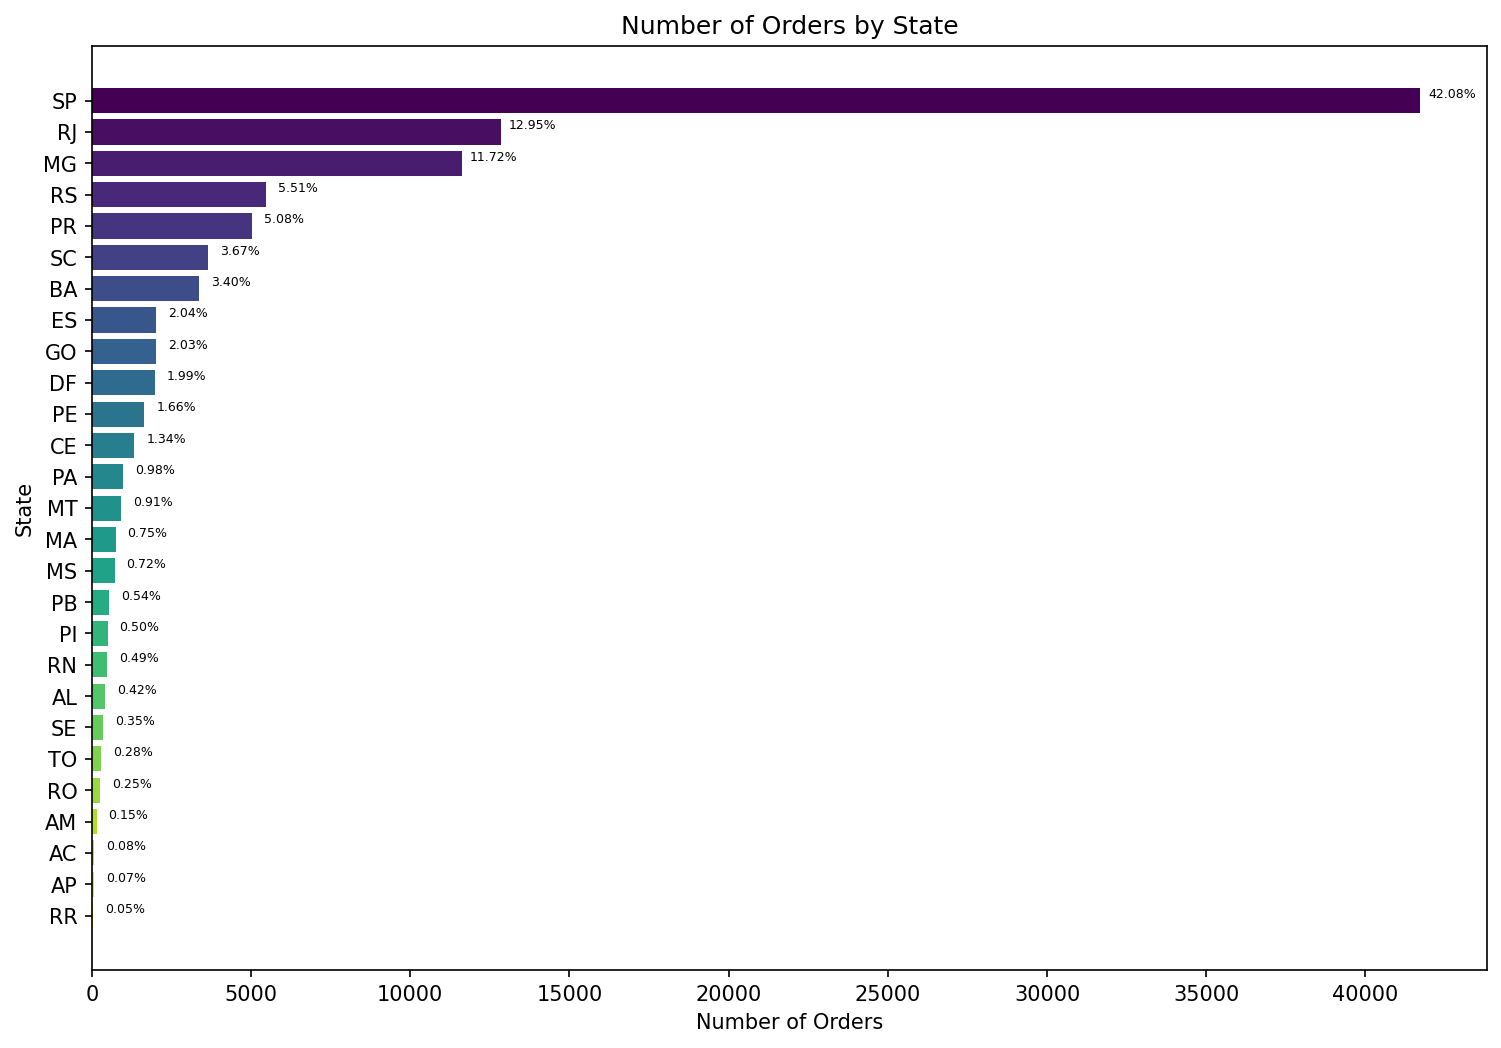

In [16]:
# Customer Orders by State

orders_ct = order_geo.groupby('customer_state').agg({'order_id': 'nunique'}).sort_values(by='order_id', ascending=True)  ## usingn nunique to count unique order ids
orders_ct.rename(columns={'order_id': 'n_orders'}, inplace=True)

colors = plt.cm.viridis(np.linspace(1, 0, len(orders_ct)))

total = sum(orders_ct.n_orders)
percentages = [f"{(value / total * 100):.2f}%" for value in orders_ct.n_orders]

plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams["figure.dpi"] = 150

bars = plt.barh(orders_ct.index, orders_ct.n_orders, color=colors)

for bar, value, percentage in zip(bars, orders_ct.n_orders, percentages):
    xval = bar.get_width()
    plt.text(xval + 1000, bar.get_y() + bar.get_height()/2, f"{percentage}", ha='center', va='bottom', fontsize=6)

plt.ylabel('State')
plt.xlabel('Number of Orders')
plt.title('Number of Orders by State')
plt.show()

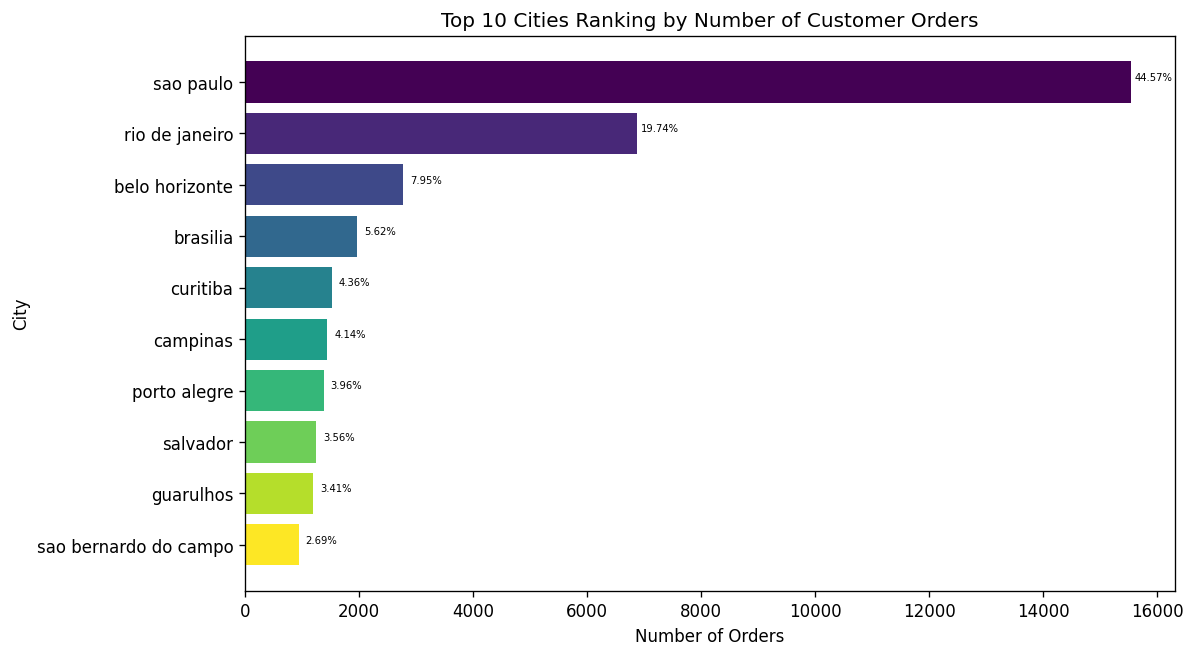

In [17]:
# Top 10 Customer Orders by City

orders_ct_city = order_geo.groupby('customer_city').agg({'order_id': 'nunique'}).sort_values(by='order_id', ascending=False).head(10)  ## usingn nunique to count unique order ids
orders_ct_city.rename(columns={'order_id': 'n_orders'}, inplace=True)
orders_ct_city.sort_values(by='n_orders', ascending=True, inplace=True)

colors = plt.cm.viridis(np.linspace(1, 0, len(orders_ct_city)))

total = sum(orders_ct_city.n_orders)
percentages = [f"{(value / total * 100):.2f}%" for value in orders_ct_city.n_orders]

plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams["figure.dpi"] = 120

bars = plt.barh(orders_ct_city.index, orders_ct_city.n_orders, color=colors)

for bar, value, percentage in zip(bars, orders_ct_city.n_orders, percentages):
    xval = bar.get_width()
    plt.text(xval + 400, bar.get_y() + bar.get_height()/2, f"{percentage}", ha='center', va='bottom', fontsize=6)

plt.ylabel('City')
plt.xlabel('Number of Orders')
plt.title('Top 10 Cities Ranking by Number of Customer Orders')
plt.show()

In [18]:
# Interactive Map of Customer Order Locations

lats = list(customer_geo['geolocation_lat'].values)
longs = list(customer_geo['geolocation_lng'].values)
locations = list(zip(lats, longs))

customer_map = folium.Map(location=[-15, -50], zoom_start=4.0)

FastMarkerCluster(data=locations).add_to(customer_map)
HeatMap(data=locations).add_to(customer_map)

customer_map.save('customer_geomap.html')

customer_map

### Summary:   
From above we can see that São Paulo state has the highest number of orders. São Paulo is the most populous and wealthiest state in Brazil, whose GDP accounts for approximately one-third of Brazil's total, reflecting a high concentration of purchasing power. Several actionable insights are:  
* Olist can focus on strengthening partnerships with local logistics providers within São Paulo to enhance delivery efficiency and service quality.  
* Olist can analyze purchasing patterns within São Paulo to offer personalized recommendations, promotions, and products that cater to the local market's preferences.

## IV.2. Customer Purchase Preferences

### 2.1 Purchase Preference By Time
* By Time of Day  
* By Day of Week

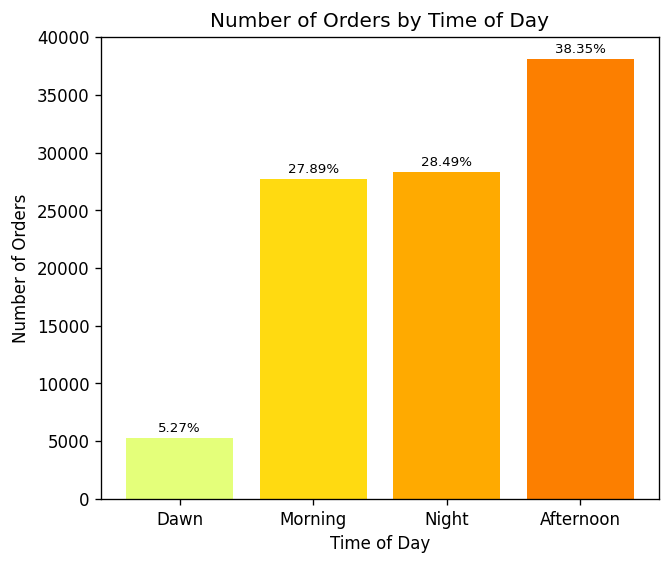

In [19]:
# By Time of Day

order_time_day = order_payment.groupby('order_purchase_time_day').agg({'order_id': 'nunique'}).sort_values(by='order_id', ascending=True)
order_time_day.rename(columns={'order_id': 'n_orders'}, inplace=True)

colors = plt.cm.Wistia(np.linspace(0, 1, len(order_time_day)))

total = sum(order_time_day.n_orders)
percentages = [f"{(value / total * 100):.2f}%" for value in order_time_day.n_orders]

plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams["figure.figsize"] = (6,5)
plt.rcParams["figure.dpi"] = 120

bars = plt.bar(order_time_day.index, order_time_day.n_orders, color=colors)

for bar, value, percentage in zip(bars, order_time_day.n_orders, percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 300, f"{percentage}", ha='center', va='bottom', fontsize=8)

plt.ylabel('Number of Orders')
plt.xlabel('Time of Day')
plt.title('Number of Orders by Time of Day')

plt.show()

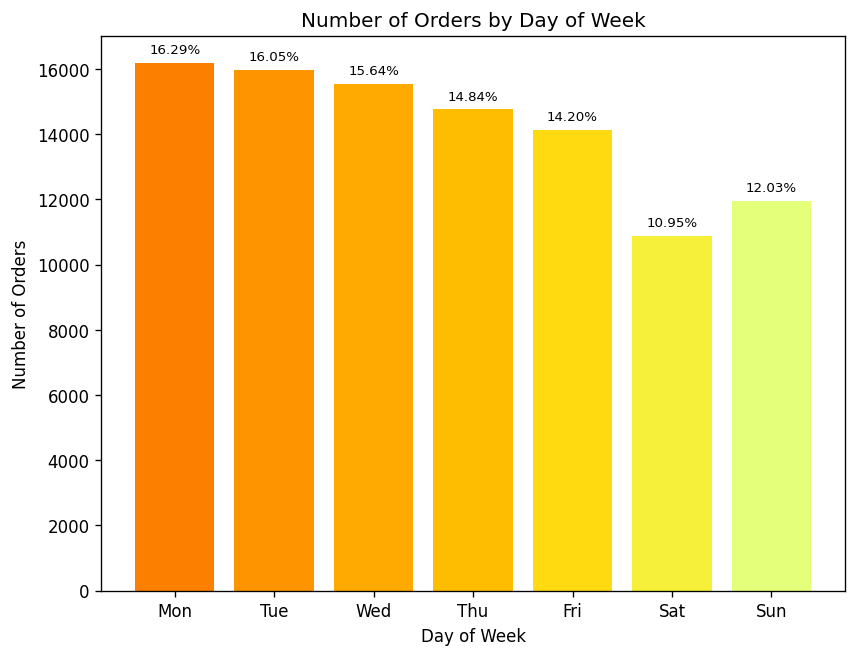

In [20]:
# By Day of Week

order_dayofweek = order_payment.groupby('order_purchase_dayofweek_name').agg({'order_id': 'nunique'}).reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
order_dayofweek.rename(columns={'order_id': 'n_orders'}, inplace=True)

colors = plt.cm.Wistia(np.linspace(1, 0, len(order_dayofweek)))

total = sum(order_dayofweek.n_orders)
percentages = [f"{(value / total * 100):.2f}%" for value in order_dayofweek.n_orders]

plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["figure.dpi"] = 120

bars = plt.bar(order_dayofweek.index, order_dayofweek.n_orders, color=colors)

for bar, value, percentage in zip(bars, order_dayofweek.n_orders, percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 200, f"{percentage}", ha='center', va='bottom', fontsize=8)

plt.ylabel('Number of Orders')
plt.xlabel('Day of Week')
plt.title('Number of Orders by Day of Week')

plt.show()


### 2.2 Purchase Preference By Payment Method

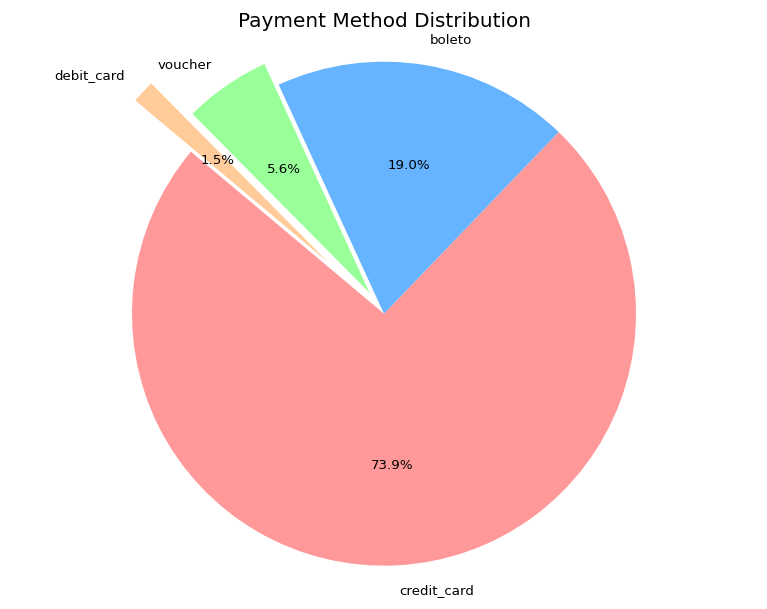

In [21]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

order_payment.payment_type.value_counts().head(4).plot.pie(colors=colors, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 8}, explode=(0,0,0.1,0.3))

plt.axis('equal')
plt.title('Payment Method Distribution')
plt.ylabel('')
plt.show()

### Summary: 

From above we can see that customers generally prefer to purchase in the afternoons compared with dawns, prefer to purchase on weekdays compared with weekends, and prefer to use credit card for payment. Some actionable insights:  
* Traffic is heavier in afternoons and on weekdays, so Olist should put more efforts on optimizing the latency of websites and transaction reliability during these peak times, and also could schedule more customer support staff to handle inquiries and issues more promptly.  
* Olist should develop weekend-specific strategies to improve weekend engagement and fully exploit the potential of weenkends, such as weekend-only deals or previews of upcoming week's promotions.
* High usage of credit cards emphasizes the importance of secure transactions, and also, Olist could partner with credit card companies to offer exclusive discounts and cashback to enhance customer retention.


## IV.3. Monthly GMV Trend Analysis

GMV is the total value of merchandise sold over a certain time period through the platform. It is a popular **North-Star Metric** for e-commerce platforms, because it directly reflects the volume of business being conducted. For a marketplace like Olist, which connects sellers and buyers, GMV can be a clear indicator of the platform's health and growth.  
Note: We included freight values in calculating GMV, i.e. we used the sum of payment values to represent GMV of Olist.

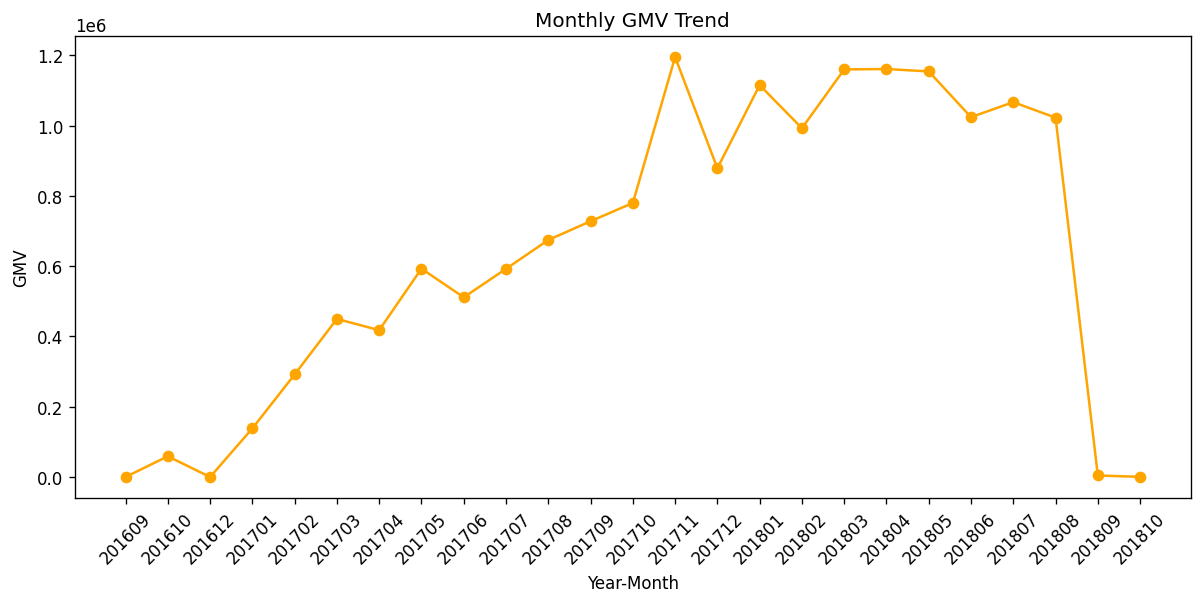

In [22]:
monthly_gmv = order_payment.groupby('order_purchase_year_month').agg({'payment_value': 'sum'}).sort_index()

plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams["figure.figsize"] = (12,5)
plt.rcParams["figure.dpi"] = 120

plt.plot(monthly_gmv.index, monthly_gmv.payment_value, marker='o', linestyle='-', color='orange')
plt.xticks(rotation=45)
plt.xlabel('Year-Month')
plt.ylabel('GMV')
plt.title('Monthly GMV Trend')

plt.show()

From above we can see that GMV data in 2016 and after 09/2018 are suspicious. Let's decompose the GMV by payment methods to dive deep into the root cause:

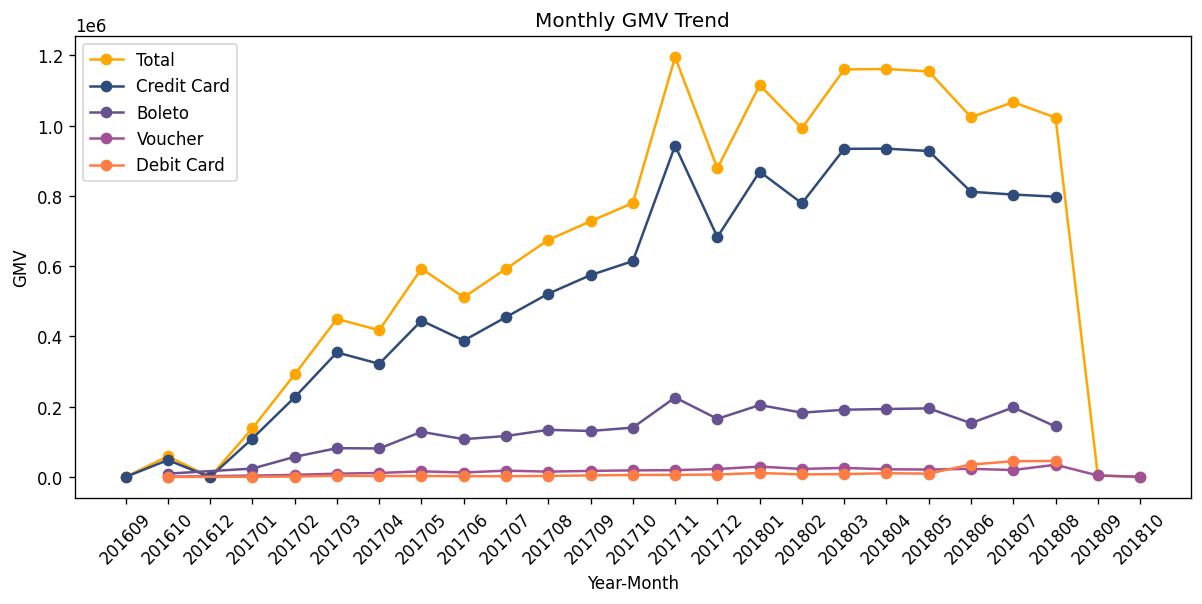

In [23]:
# Monthly GMV Trend by Payment Type
monthly_gmv_credit_card = order_payment.query('payment_type == "credit_card"').groupby('order_purchase_year_month').agg({'payment_value': 'sum'}).sort_index()
monthly_gmv_boleto = order_payment.query('payment_type == "boleto"').groupby('order_purchase_year_month').agg({'payment_value': 'sum'}).sort_index()
monthly_gmv_voucher = order_payment.query('payment_type == "voucher"').groupby('order_purchase_year_month').agg({'payment_value': 'sum'}).sort_index()
monthly_gmv_debit_card = order_payment.query('payment_type == "debit_card"').groupby('order_purchase_year_month').agg({'payment_value': 'sum'}).sort_index()

plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams["figure.figsize"] = (12,5)
plt.rcParams["figure.dpi"] = 120


plt.plot(monthly_gmv.index, monthly_gmv.payment_value, marker='o', linestyle='-', color='#ffa600')
plt.plot(monthly_gmv_credit_card.index, monthly_gmv_credit_card.payment_value, marker='o', linestyle='-', color='#2f4b7c')
plt.plot(monthly_gmv_boleto.index, monthly_gmv_boleto.payment_value, marker='o', linestyle='-', color='#665191')
plt.plot(monthly_gmv_voucher.index, monthly_gmv_voucher.payment_value, marker='o', linestyle='-', color='#a05195')
plt.plot(monthly_gmv_debit_card.index, monthly_gmv_debit_card.payment_value, marker='o', linestyle='-', color='#ff7c43')

plt.legend(['Total', 'Credit Card', 'Boleto', 'Voucher', 'Debit Card'])
plt.xticks(rotation=45)
plt.xlabel('Year-Month')
plt.ylabel('GMV')
plt.title('Monthly GMV Trend')

plt.show()

So we found out that the GMV after 08/2018 is only composed of 'Voucher' payments, which is pretty weird.  
To ensure the effectiveness, we remove these data, i.e.  
We will be focusing on data between 01/2017 and 08/2018 in the following year-over-year analyses. 

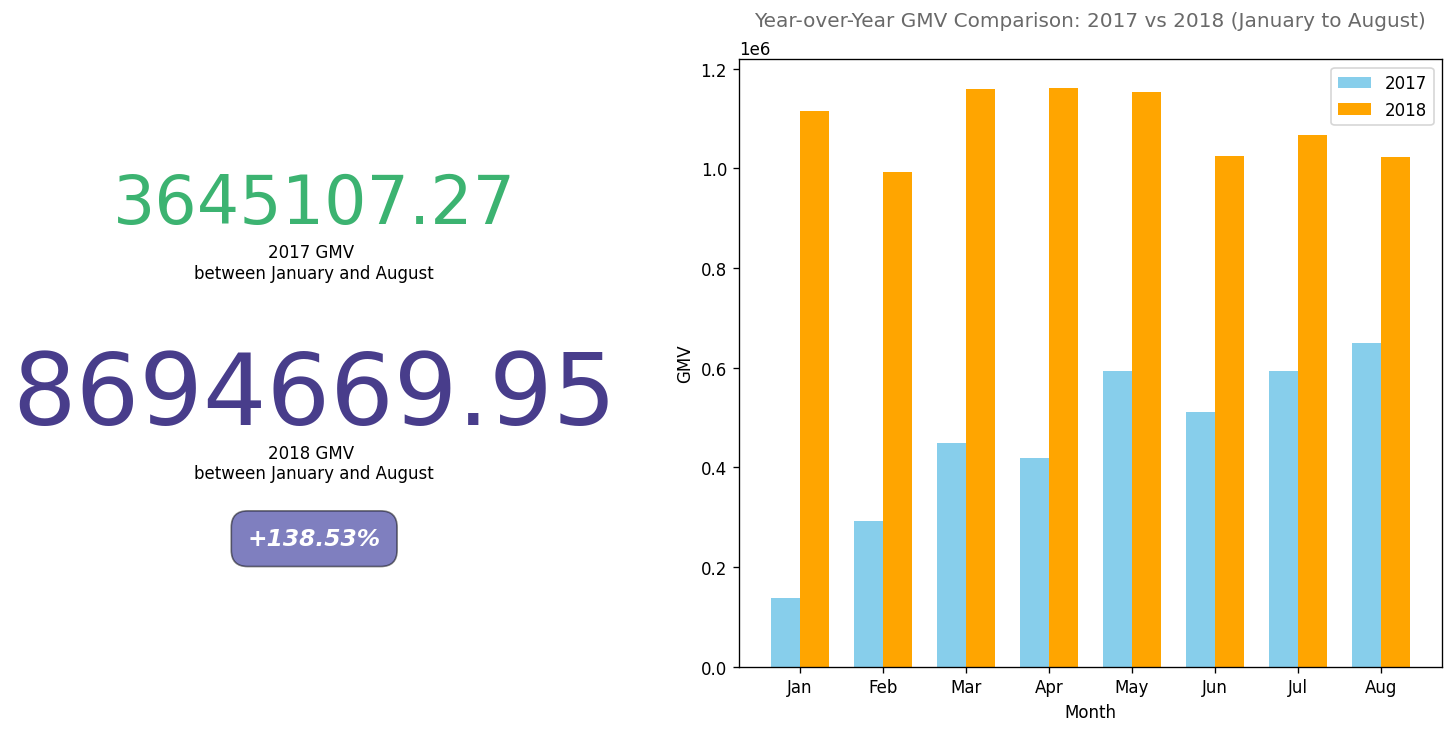

In [24]:
# Year-over-Year GMV Analysis: 2017 vs 2018 (Jan - Aug)

fig = plt.figure(constrained_layout=True, figsize=(12, 6))

gs = GridSpec(1, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1:])


order_payment_17 = order_payment.query('order_purchase_timestamp >= "2017-01-01" and order_purchase_timestamp <= "2017-08-31"')
order_payment_18 = order_payment.query('order_purchase_timestamp >= "2018-01-01" and order_purchase_timestamp <= "2018-08-31"')

monthly_gmv_17 = order_payment_17.groupby('order_purchase_year_month').agg({'payment_value': 'sum'}).sort_index()
monthly_gmv_18 = order_payment_18.groupby('order_purchase_year_month').agg({'payment_value': 'sum'}).sort_index()

ax1.text(0.00, 0.73, f'{round(order_payment_17.payment_value.sum(), 2)}', fontsize=40, color='mediumseagreen', ha='center')
ax1.text(0.00, 0.64, '2017 GMV \nbetween January and August', fontsize=10, ha='center')
ax1.text(0.00, 0.40, f'{round(order_payment_18.payment_value.sum(), 2)}', fontsize=60, color='darkslateblue', ha='center')
ax1.text(0.00, 0.31, '2018 GMV \nbetween January and August', fontsize=10, ha='center')
ax1.text(0.00, 0.20, f'+{round(100*(order_payment_18.payment_value.sum()-order_payment_17.payment_value.sum())/order_payment_17.payment_value.sum(), 2)}%', 
         fontsize=14, ha='center', color='white', style='italic', weight='bold',
         bbox=dict(facecolor='navy', alpha=0.5, pad=10, boxstyle='round, pad=.7'))
ax1.axis('off')

bar_width = 0.35
ax2.bar(np.arange(8), monthly_gmv_17.payment_value.values, bar_width, color='skyblue')
ax2.bar(np.arange(8)+bar_width, monthly_gmv_18.payment_value.values, bar_width, color='orange')

month_label = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']
ax2.set_xticks(np.arange(8)+bar_width/2)
ax2.set_xticklabels(month_label)
ax2.set_xlabel('Month')
ax2.set_ylabel('GMV')
ax2.set_title('Year-over-Year GMV Comparison: 2017 vs 2018 (January to August)', size=12, color='dimgrey', pad=20)
ax2.legend(['2017', '2018'])


plt.show()


### Summary:
Above indicates that the GMV of Olist in 2018 was 138% higher than 2017, with each month showing a year-over-year growth, presenting a picture of robust and accelerating growth during this period. This substantial increase in GMV suggests putting a stronger focus on customer acquisition, platform technology improvements, and a potential of market expansion. 


# V. Statistical Analysis

In this part, we utilized statistical and graphical analytic methods to investigate into Olist Data, focusing on mainly two aespects:  
* Customer-wise Data  
* Time Series Data of GMV

**Note:** We incoporated graphical analysis in each part of following statistical analysis, aiding statistical methods with data visualization.

## V.1. Descriptive Statistics

### Customer RFM 

In [58]:
rfm.head()

customer_unique_id order_purchase_timestamp  Recency  \
0  0000366f3b9a7992bf8c76cfdf3221e2      2018-05-10 10:56:27      160   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      2018-05-07 11:11:27      163   
2  0000f46a3911fa3c0805444483337064      2017-03-10 21:05:03      585   
3  0000f6ccb0745a6a4b88665a16c9f078      2017-10-12 20:29:41      369   
4  0004aac84e0df4da2b147fca70cf8255      2017-11-14 19:45:42      336   

   Frequency  Monetary  
0          1    141.90  
1          1     27.19  
2          1     86.22  
3          1     43.62  
4          1    196.89

In [59]:
rfm[['Recency', 'Frequency', 'Monetary']].describe()

Recency     Frequency      Monetary
count  95826.000000  95826.000000  95826.000000
mean     287.758656      1.081105    166.593165
std      153.429504      0.462975    231.497146
min        0.000000      1.000000      0.000000
25%      163.000000      1.000000     63.120000
50%      268.000000      1.000000    108.000000
75%      397.000000      1.000000    183.520000
max      772.000000     33.000000  13664.080000

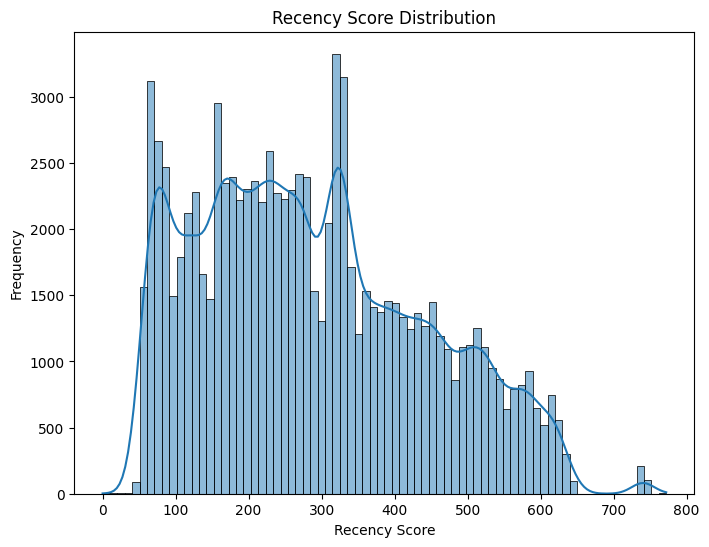

In [75]:
# Histogram of Recency

plt.figure(figsize=(8, 6))
sns.histplot(rfm['Recency'], kde=True)
plt.xlabel('Recency Score')
plt.ylabel('Frequency')
plt.title('Recency Score Distribution')
plt.show()


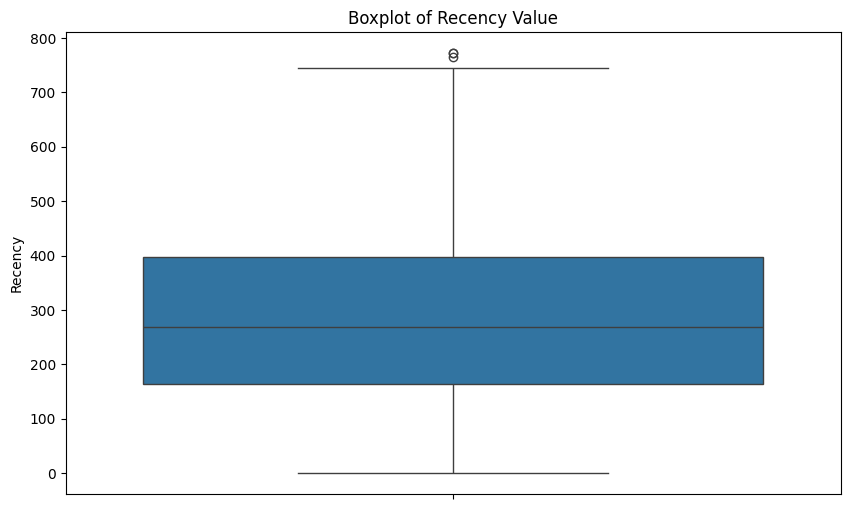

In [61]:
plt.figure(figsize=(10, 6))
sns.boxplot(rfm.Recency)
plt.title('Boxplot of Recency Value')
plt.show()

In [76]:
rfm.Frequency.value_counts(normalize=True).sort_index()

Frequency
1     0.940402
2     0.049924
3     0.005771
4     0.001701
5     0.000710
6     0.000532
7     0.000313
8     0.000146
9     0.000115
10    0.000063
11    0.000073
12    0.000063
13    0.000042
14    0.000031
15    0.000021
16    0.000010
17    0.000010
19    0.000021
22    0.000010
23    0.000010
26    0.000010
29    0.000010
33    0.000010
Name: proportion, dtype: float64

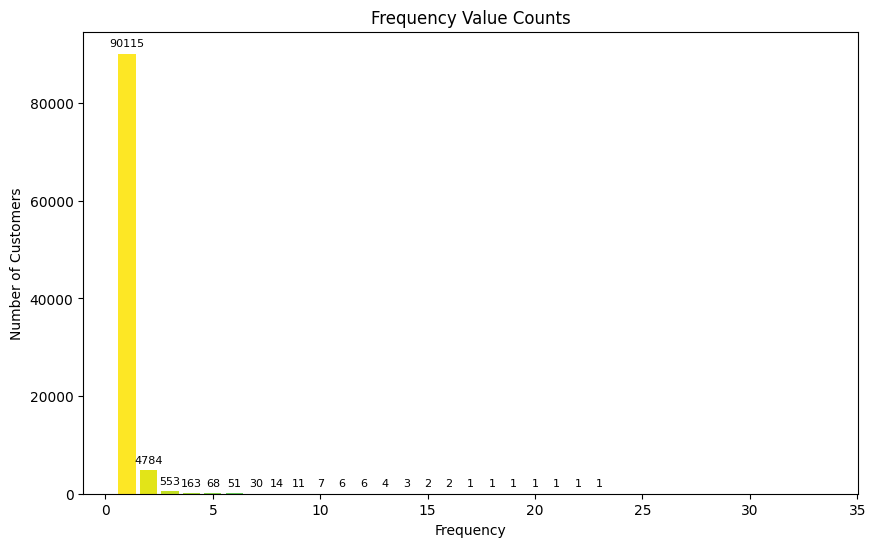

In [71]:
# barplot of Frequency 

plt.figure(figsize=(10, 6))

colors = plt.cm.viridis(np.linspace(1, 0, len(rfm.Frequency.value_counts())))

plt.bar(rfm.Frequency.value_counts().index, rfm.Frequency.value_counts().values, color=colors)

for i, v in enumerate(rfm.Frequency.value_counts().values):
    plt.text(i+1, v+1000, str(v), ha='center', va='bottom', fontsize=8)

plt.title('Frequency Value Counts')
plt.xlabel('Frequency')
plt.ylabel('Number of Customers')
plt.show()

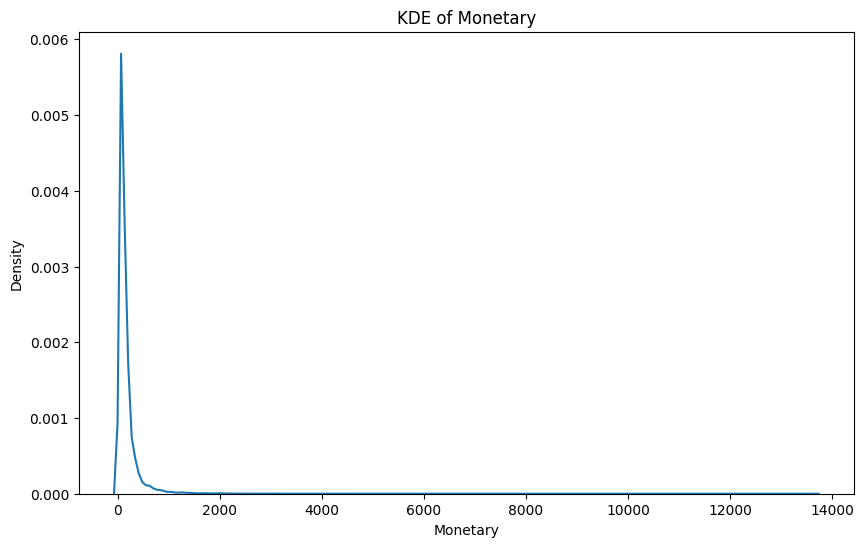

In [72]:
# KDE of Monetary

plt.figure(figsize=(10, 6))
sns.kdeplot(rfm.Monetary)
plt.title('KDE of Monetary')
plt.xlabel('Monetary')
plt.ylabel('Density')
plt.show()


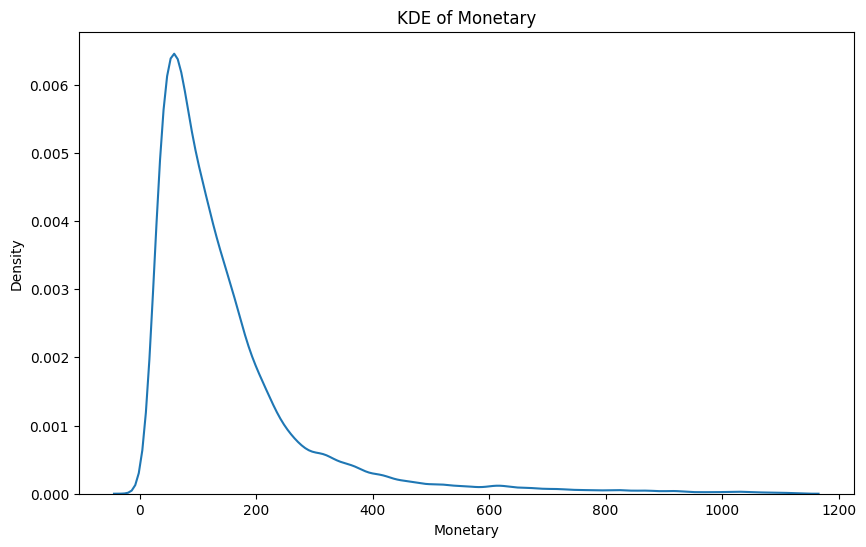

In [82]:
# KDE of Monetary

plt.figure(figsize=(10, 6))
sns.kdeplot(rfm[rfm.Monetary < rfm.Monetary.quantile(0.99)].Monetary)
plt.title('KDE of Monetary')
plt.xlabel('Monetary')
plt.ylabel('Density')
plt.show()

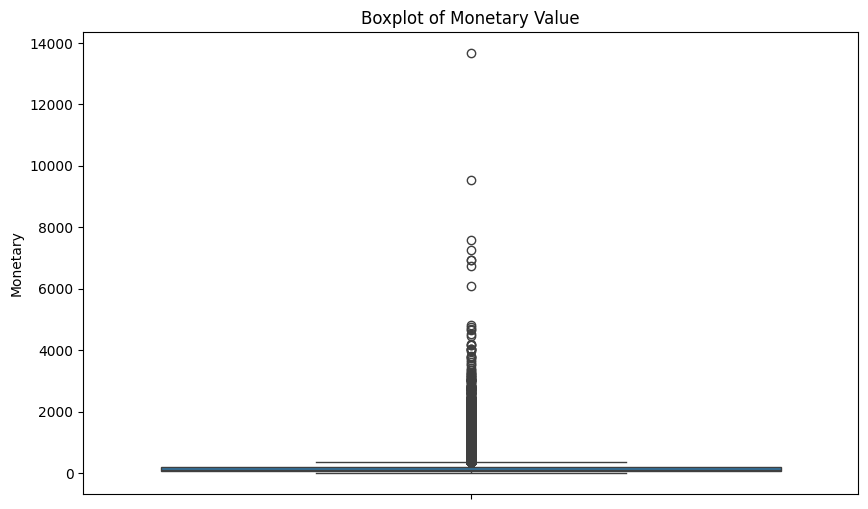

In [63]:
# boxplot of Monetary
plt.figure(figsize=(10, 6))
sns.boxplot(rfm.Monetary)
plt.title('Boxplot of Monetary Value')
plt.show()

Through descriptive analysis of RFM values, we found that:  
* Recency value is primarily concentrated between 150 and 400, a little bit right-skewed, indicating that most of our customers had their latest purchase between 5 months and 13 months prior to the cut-off date of our data.  
* 94% of the Frequency scores are 1, indicating that most of the customers only purchased once within our data, but there are some of customers who purchased more than once. These are returning customers of Olist E-commerce Platform, related to the platform's retention rate.  
* Monetary value is extremely right-skewed, with 99% of the data < 1000, but outliers can have extremely high values, up to > 10000.  

### Customer Review Features

In [83]:
customer_review_agg.head()

customer_unique_id  avg_review_score  order_counts  \
0  0000366f3b9a7992bf8c76cfdf3221e2               5.0             1   
1  0000b849f77a49e4a4ce2b2a4ca5be3f               4.0             1   
2  0000f46a3911fa3c0805444483337064               3.0             1   
3  0000f6ccb0745a6a4b88665a16c9f078               4.0             1   
4  0004aac84e0df4da2b147fca70cf8255               5.0             1   

   review_score_counts  review_comment_counts  rating_rate  comment_rate  
0                    1                      1          1.0           1.0  
1                    1                      0          1.0           0.0  
2                    1                      0          1.0           0.0  
3                    1                      1          1.0           1.0  
4                    1                      0          1.0           0.0

In [85]:
customer_review_agg.info()

## only avg_review_score has missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96096 entries, 0 to 96095
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_unique_id     96096 non-null  object 
 1   avg_review_score       95380 non-null  float64
 2   order_counts           96096 non-null  int64  
 3   review_score_counts    96096 non-null  int64  
 4   review_comment_counts  96096 non-null  int64  
 5   rating_rate            96096 non-null  float64
 6   comment_rate           96096 non-null  float64
dtypes: float64(3), int64(3), object(1)
memory usage: 5.1+ MB


In [86]:
customer_review_agg[['avg_review_score', 'rating_rate', 'comment_rate']].describe()

avg_review_score   rating_rate  comment_rate
count      95380.000000  96096.000000  96096.000000
mean           4.084989      0.992340      0.427640
std            1.341571      0.086584      0.492924
min            1.000000      0.000000      0.000000
25%            4.000000      1.000000      0.000000
50%            5.000000      1.000000      0.000000
75%            5.000000      1.000000      1.000000
max            5.000000      1.000000      1.000000

In [111]:
avg_review_score = customer_review_agg.avg_review_score.value_counts().reset_index().sort_values(by='avg_review_score')
avg_review_score['avg_review_score'] = avg_review_score['avg_review_score'].round(2)
avg_review_score['log_count'] = np.log10(avg_review_score['count'])

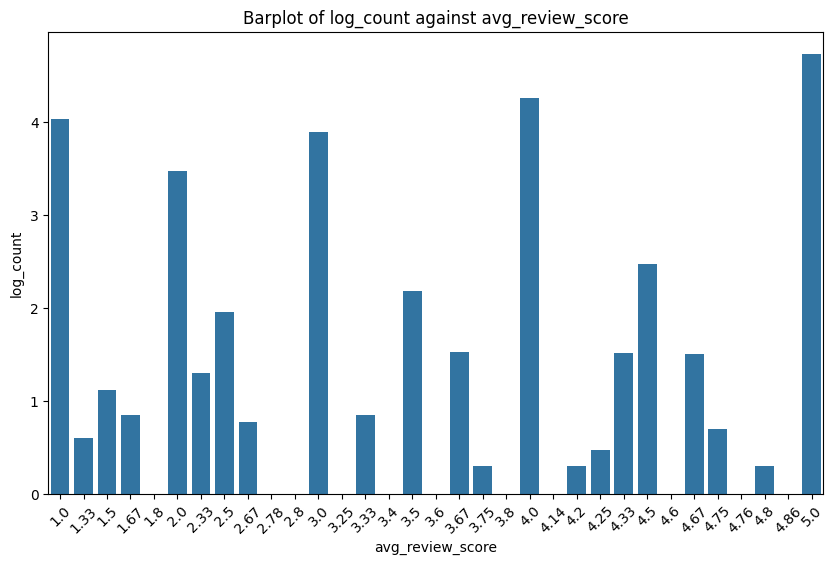

In [112]:
plt.figure(figsize=(10, 6))
sns.barplot(x='avg_review_score', y='log_count', data=avg_review_score)
plt.title('Barplot of log_count against avg_review_score')
plt.xticks(rotation=45)
plt.xlabel('avg_review_score')
plt.ylabel('log_count')
plt.show()


In [113]:
customer_review_agg.rating_rate.value_counts().sort_index()

rating_rate
0.000000      716
0.333333        2
0.500000       35
0.666667        3
0.750000        1
1.000000    95339
Name: count, dtype: int64

In [114]:
customer_review_agg.comment_rate.value_counts().sort_index()

comment_rate
0.000000    54646
0.142857        1
0.166667        2
0.200000        1
0.250000       11
0.333333       48
0.400000        3
0.500000      584
0.600000        2
0.666667       46
0.750000        6
0.800000        1
0.833333        2
1.000000    40743
Name: count, dtype: int64

Most of the customers scored their order, and only a small proportion of customers only scored some of their orders.  
For commenting, the proportion of customers who never wrote review comments is almost equal to the proportion of customers who always wrote review comments for their orders, and a small proportion of customers only wrote review comments for some of their orders.  
It's understandable that people are generally much more willing to merely score an order compared to writing a comment, simply because the former one requires much less effort.  
However, the rating rate and comment rate of a customer can be pontential factors that may influence customer's LTV. 

### Customer Payment Method Features

In [125]:
customer_paytype.head()

customer_unique_id most_frequent_payment_types  \
0  0000366f3b9a7992bf8c76cfdf3221e2                 credit_card   
1  0000b849f77a49e4a4ce2b2a4ca5be3f                 credit_card   
2  0000f46a3911fa3c0805444483337064                 credit_card   
3  0000f6ccb0745a6a4b88665a16c9f078                 credit_card   
4  0004aac84e0df4da2b147fca70cf8255                 credit_card   

   n_payment_types  
0                1  
1                1  
2                1  
3                1  
4                1

In [129]:
customer_paytype.most_frequent_payment_types.value_counts(normalize=True)

most_frequent_payment_types
credit_card    0.757216
boleto         0.199382
voucher        0.027884
debit_card     0.015486
not_defined    0.000031
Name: proportion, dtype: float64

In [131]:
customer_paytype.n_payment_types.value_counts(normalize=True).sort_index()

n_payment_types
1    0.973567
2    0.026245
3    0.000188
Name: proportion, dtype: float64

In [130]:
customer_paytype[customer_paytype.n_payment_types==1].most_frequent_payment_types.value_counts(normalize=True)

most_frequent_payment_types
credit_card    0.765352
boleto         0.203359
debit_card     0.015671
voucher        0.015596
not_defined    0.000021
Name: proportion, dtype: float64

More than 75% customers used credit card as their most frequent payment method, followed by boleto accounting for 20%, which is a type of financial document that represents a cash-based invoice in Brazil. Notice that only a small proportion of customer used debit card as their first choice.  
  
Credit card V.S. debit card: Credit card is much more popular in Brazil than debit card, and the following reasons may serve as explanation:  
* Credit cards provide access to credit and the ability to make purchases even when consumers do not have immediate funds. This is particularly appealing in Brazil, where credit cards often offer the option to pay in installments without interest. This feature makes larger purchases more manageable for consumers and is a significant advantage over debit cards, which deduct funds directly from one's bank account.
* Rewards and Benefits: Credit cards in Brazil frequently come with rewards programs, offering points, cashback, or miles that can be redeemed for various goods and services. These incentives encourage the use of credit cards over debit cards, which typically do not offer comparable rewards.
* Security Concerns: Credit cards generally offer better fraud protection than debit cards. In the case of fraudulent transactions, credit card users are often able to dispute charges without having immediate funds withdrawn from their bank account, as would be the case with a debit card.
  
More about boleto: Although Brazil has made significant strides in financial inclusion, a segment of the population remains unbanked or underbanked, with limited access to banking services, including credit cards and debit cards. Boleto bancário serves as an inclusive payment option for these consumers, allowing them to participate in e-commerce even without bank account.

Customers behavior in payment method choice may influence customer's LTV in following aspects:  
1. Impact of Most Frequently Used Payment Method  
* Payment Flexibility and Convenience: Customers who use credit cards most frequently may perceive a higher level of payment flexibility and convenience, potentially leading to higher transaction values and more frequent purchases. Also, Credit cards often offer benefits such as reward points and cashback, which can incentivize customers to spend more, positively impacting their LTV.  
* Loyalty: A customer’s trust in their preferred payment method can lead to increased satisfaction and loyalty, thereby enhancing LTV.  
* Payment Method Accessibility: In regions like Brazil, where a significant portion of the population may be unbanked or have limited access to traditional banking services, alternative payment methods like boleto bancário are popular. Customers using such inclusive payment options might exhibit different shopping behaviors compared to those using bank-related payment methods, potentially affecting their LTV.  
  
2. Impact of Number of Different Payment Methods Used  
* Flexibility in Payment Method: Customers who use multiple payment methods might be more engaged and have a higher potential LTV. This behavior can indicate that they are more committed to finding ways to make purchases from the platform, suggesting a higher level of loyalty and engagement.  
* Risk Diversification: Customers who use multiple payment methods might be less impacted by issues with a single payment method (e.g., credit card fraud or expiration). This can lead to more consistent purchasing behavior over time, positively affecting LTV.  

### Customer Product Purchase Features

In [132]:
customer_product_agg.head()

customer_unique_id most_frequent_product_category
0  0000366f3b9a7992bf8c76cfdf3221e2                 bed_bath_table
1  0000b849f77a49e4a4ce2b2a4ca5be3f                  health_beauty
2  0000f46a3911fa3c0805444483337064                     stationery
3  0000f6ccb0745a6a4b88665a16c9f078                      telephony
4  0004aac84e0df4da2b147fca70cf8255                      telephony

In [133]:
customer_product_agg.most_frequent_product_category.value_counts()

most_frequent_product_category
bed_bath_table               8901
health_beauty                8542
sports_leisure               7373
computers_accessories        6449
furniture_decor              6081
                             ... 
arts_and_craftmanship          19
cds_dvds_musicals              12
la_cuisine                     10
fashion_childrens_clothes       7
security_and_services           2
Name: count, Length: 71, dtype: int64

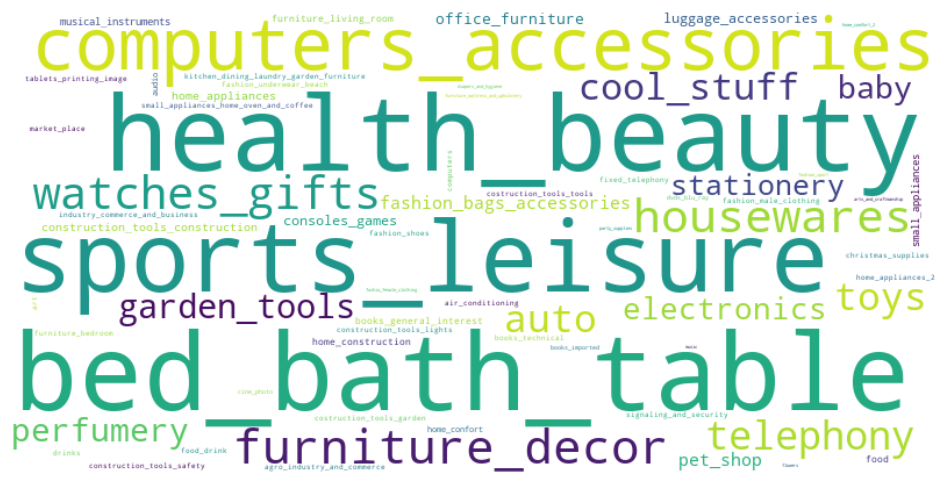

In [134]:
# generste wordcloud for most frequent product category

category_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(Counter(customer_product_agg.most_frequent_product_category.dropna()))
plt.figure(figsize=(12, 8))
plt.imshow(category_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

further categorize

## V.2. Inferential Statistics

Hypothesis Testing  
问问这玩意和comparative, multivariate的关系

## V.3. Comparative Analysis

## V.4. Multivariate Analysis